In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
titanic_data = pd.read_csv('/content/tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [8]:
titanic_data = titanic_data.drop(columns =['PassengerId','Cabin','Name','Ticket'],axis=1)

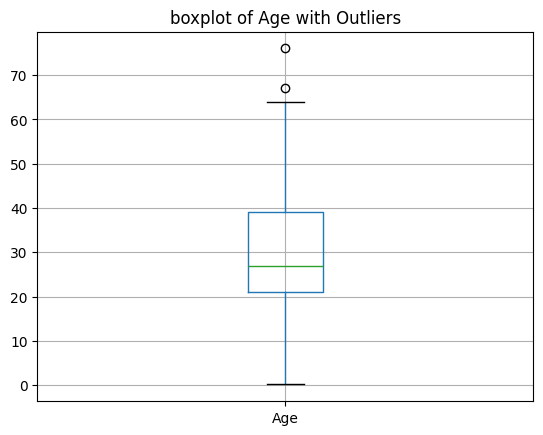

In [9]:
#menghapus outlier

titanic_data.boxplot(column=['Age'])
plt.title("boxplot of Age with Outliers")
plt.show()

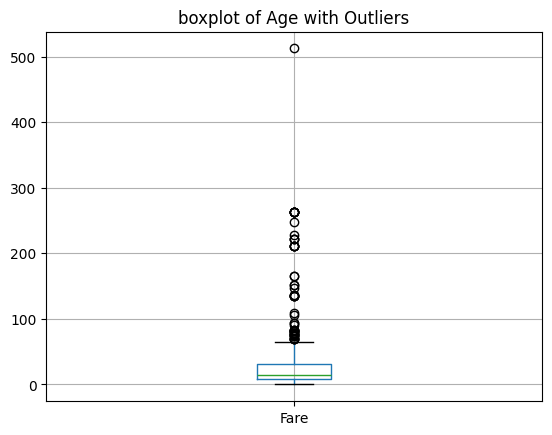

In [10]:
titanic_data.boxplot(column=['Fare'])
plt.title("boxplot of Age with Outliers")
plt.show()

In [47]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())

In [13]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [14]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [18]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,266
female,152


In [19]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93


Text(0.5, 1.0, 'Survival by Embarked')

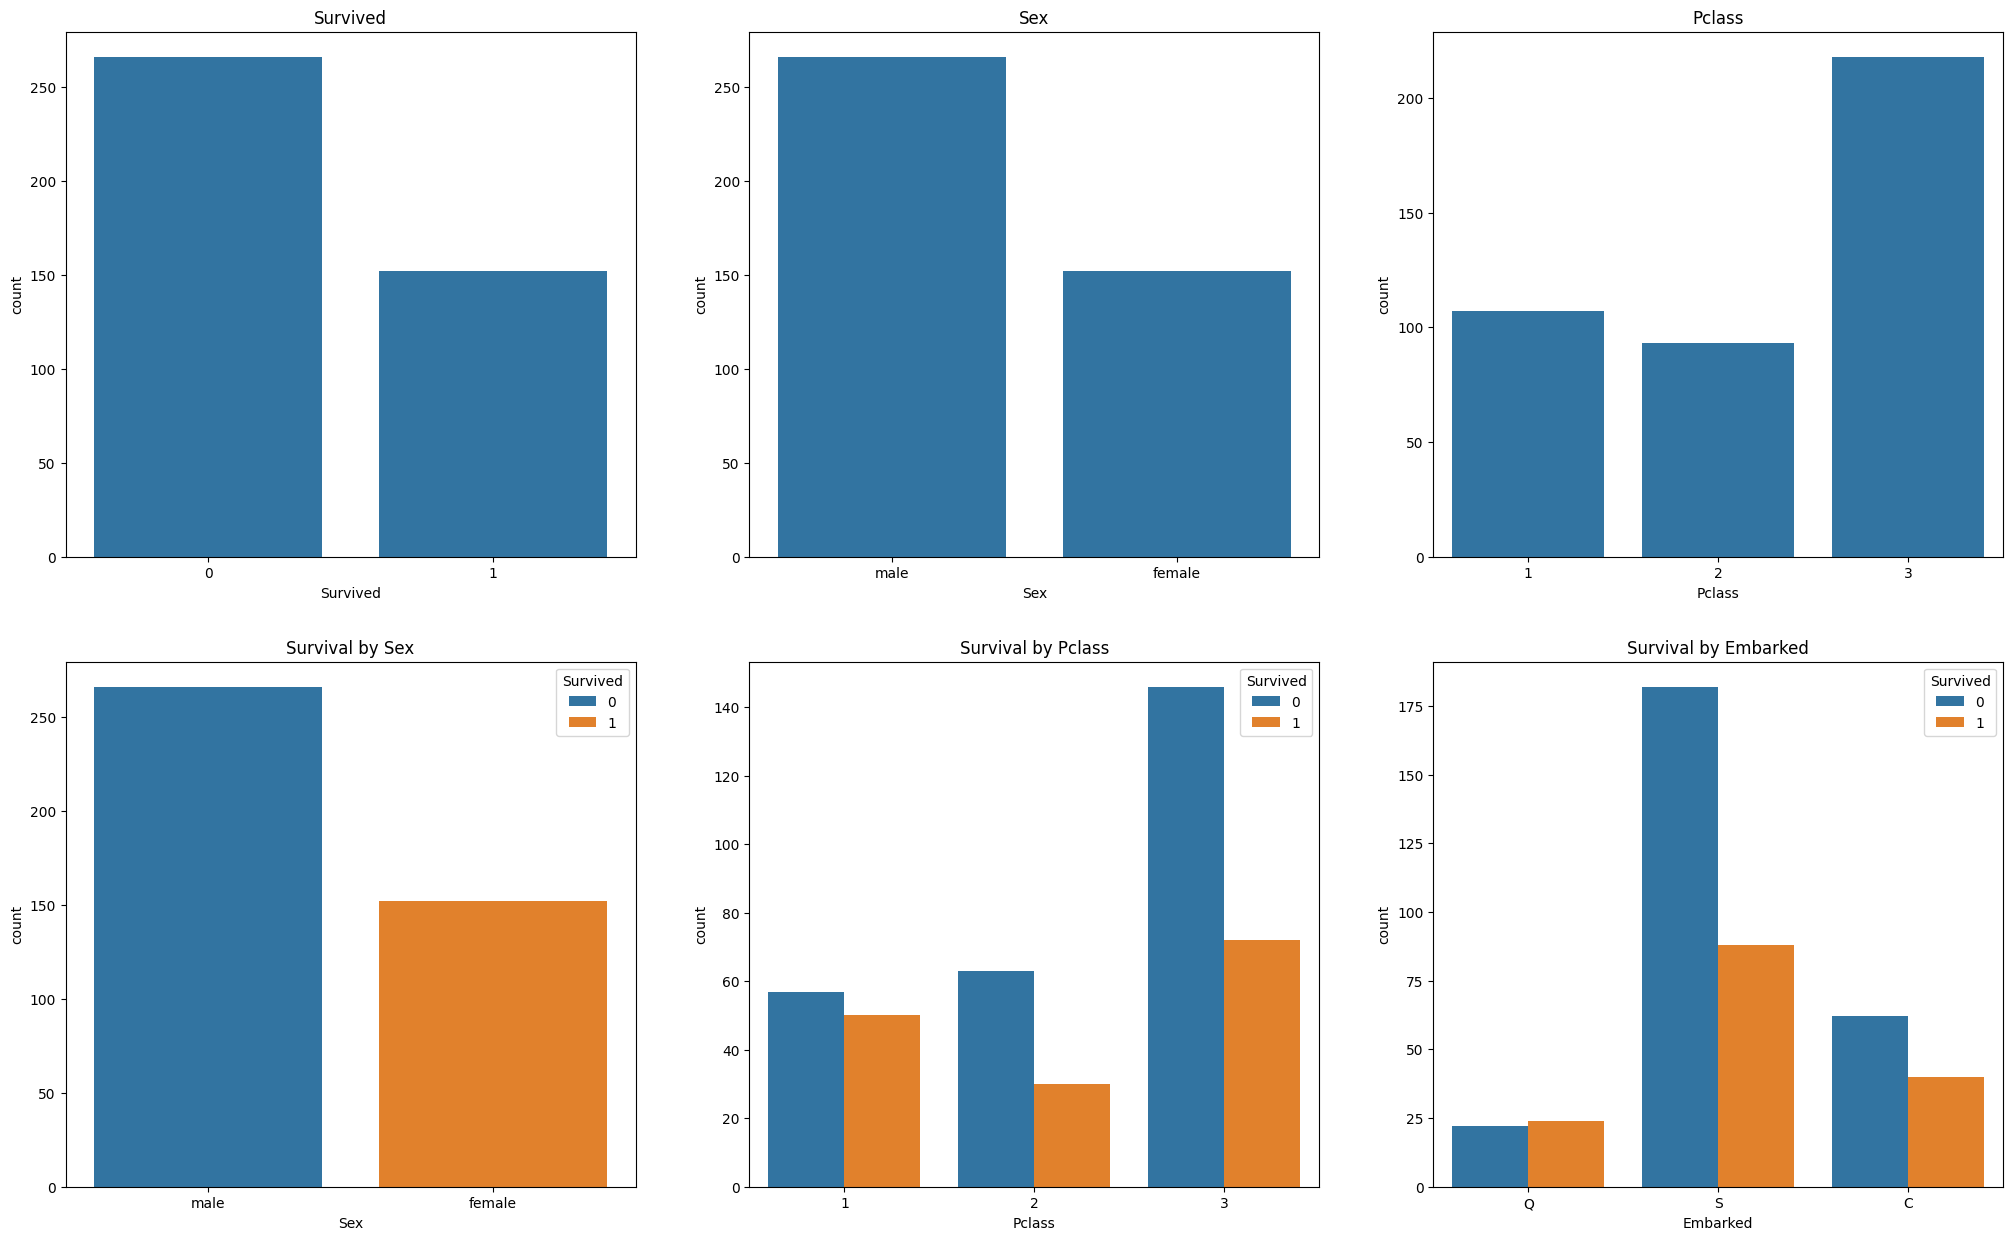

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(25,15))
axes = axes.flatten()

sns.countplot(x='Survived',data=titanic_data,ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x='Sex',data=titanic_data,ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x='Pclass',data=titanic_data,ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x='Sex',hue ='Survived',data=titanic_data,ax=axes[3])
axes[3].set_title('Survival by Sex')

sns.countplot(x='Pclass',hue ='Survived',data=titanic_data,ax=axes[4])
axes[4].set_title('Survival by Pclass')

sns.countplot(x='Embarked',hue ='Survived',data=titanic_data,ax=axes[5])
axes[5].set_title('Survival by Embarked')

In [25]:
replacements = {
    'Sex' : {'male':0,'female':1},
    'Embarked' : {'S':0,'C':1,'Q':2 }
}
titanic_data.replace(replacements,inplace = True )

/tmp/ipython-input-943627134.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace(replacements,inplace = True )


In [26]:
titanic_data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


In [29]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [52]:
X = titanic_data.drop(columns=['Survived'])
Y = titanic_data['Survived']

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [58]:
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [59]:

print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score (Y_test, test_pred_nb))

Training Accuracy (NB):  1.0
Testing Accuracy (NB):  1.0


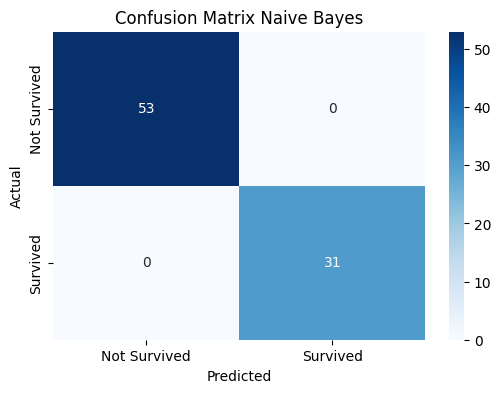

In [60]:
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
xticklabels=['Not Survived', 'Survived'],
yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
print("\nClassification Report (NB):")
print(classification_report(Y_test, test_pred_nb))


Classification Report (NB):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

